<a href="https://colab.research.google.com/github/alfredwisana/DPV/blob/main/Practical%201/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/DPV/Practical 1/Practical 1/diabetes.tab.csv",delimiter=",")

In [4]:
df.head(5)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [6]:
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [7]:
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_range'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

In [11]:
age_progression = df.groupby('age_range')['Y'].mean().reset_index()
age_progression.columns = ['Age Range', 'Mean Progression']
age_progression

,Age Range,Mean Progression
0,20-29,125.121951
1,30-39,138.397260
2,40-49,139.649485
3,50-59,163.512000
4,60-69,171.877778
5,70-79,159.923077


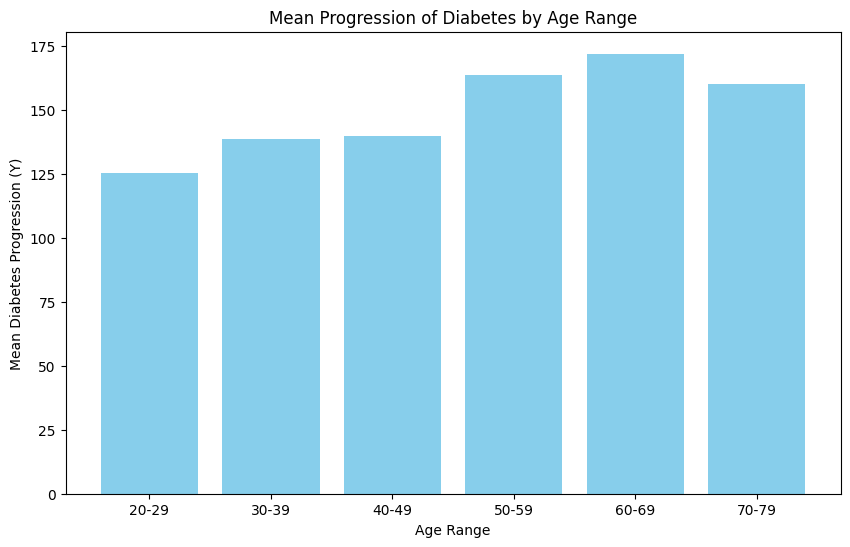

In [12]:
# Analyze the progression of diabetes by age range


# Plot the progression of diabetes by age range
plt.figure(figsize=(10, 6))
plt.bar(age_progression['Age Range'], age_progression['Mean Progression'], color='skyblue')
plt.title('Mean Progression of Diabetes by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Mean Diabetes Progression (Y)')
plt.show()

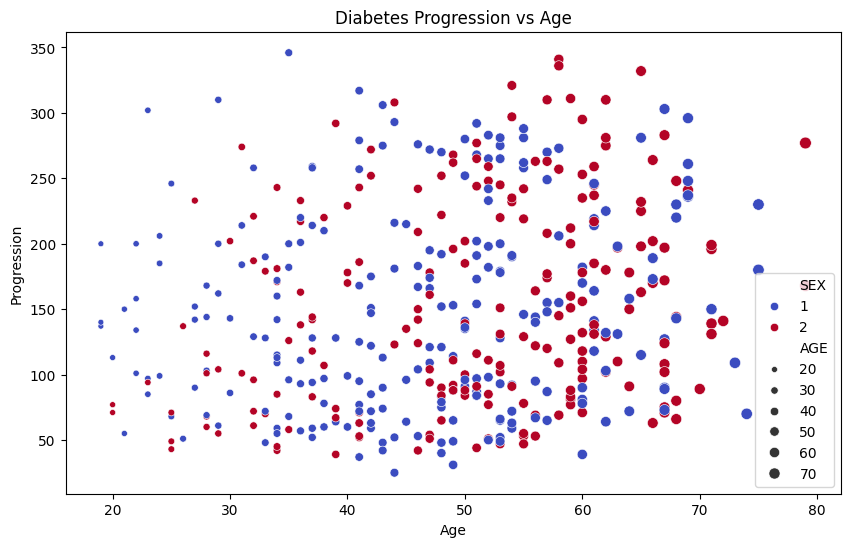

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(df, x='AGE', y='Y',size='AGE', hue='SEX', palette='coolwarm')  # Cari palette lain yang disediakan oleh matplotlib
plt.xlabel('Age')
plt.ylabel('Progression')
plt.title('Diabetes Progression vs Age')
plt.show()